<a href="https://colab.research.google.com/github/kanyijohn/Deep-Learning-ML-models/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 1. LOADING AND PREPEOCESSING CIFAR-10 DATASET- It has dataset has 10 classes:
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values (0-255) to (0-1) to make training more efficient.
x_train, x_test = x_train / 255.0, x_test / 255.0

# Check data shape(image no, pixel dimensions and color scheme)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
# 2.CREATING THE CNN MODEL USING TENSORFLOW'S KERAS SEQUENTIAL API.

model = keras.Sequential([ # A Sequential model (CNN model), to make the layers get stacked one after another.


    # Layer 1- Convulational Layer (identifies and extracts the image features)

    layers.Conv2D (32, (3, 3), # Adds a convolutional layer with 32 filters, each 3×3 in size.
                  activation='relu', # Applies ReLU (Rectified Linear Unit) activation to introduce non-linearity
                  input_shape=(32, 32, 3)), # Defines the input image dimensions (32×32 pixels, 3 color channels).


    # Layer 2- Max Pooling (Pooling layer-downsamples data features to reduce overfitting and computational costs)

    layers.MaxPooling2D((2, 2)), # Performs downsampling using 2×2 max pooling to reduce spatial dimensions by half (32×32 → 16×16).

    # Second Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'), # 64 filters of size 3×3. Extracts higher-level features from the images.

    # Second Max Pooling
    layers.MaxPooling2D((2, 2)), # reduces the feature map size (16×16 → 8×8).

    # Third Convulational Layer
    layers.Conv2D(128, (3, 3), activation='relu'), # A deeper convolutional layer with 128 filters helping the network capture complex patterns in the images.

    # Flattening the Output
    layers.Flatten(), # Converts the multi-dimensional feature maps into a one-dimensional vector. Needed to connect the output to fully connected layers.


    # Layer 3- Fully Connected Dense Layer (connected convulated layers with same number of units as the number of classes and the output activation function such as “softmax” or “sigmoid”)

    # A fully connected layer with 128 neurons and Activation = ReLU to introduce non-linearity.
    layers.Dense(128, activation='relu'),

    # Output Layer- Output layer with 10 neurons, one for each class. Activation = Softmax: Converts outputs into probabilities
    layers.Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])

# 3. COMPILING THE MDOEL
model.compile(optimizer='adam', # Optimizer: Adam - Efficient and adaptive optimization algorithm.
              loss='sparse_categorical_crossentropy', # Used for multi-class classification when labels are integer values.
              metrics=['accuracy']) # Measures the percentage of correctly classified images.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 4. TRAINING THE MODEL
history = model.fit(x_train, y_train, epochs=10, # Trains the model for 10 epochs (iterations over the full dataset).
                    validation_data=(x_test, y_test)) # Uses validation data (x_test, y_test) to monitor performance.

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 35ms/step - accuracy: 0.3639 - loss: 1.7209 - val_accuracy: 0.5602 - val_loss: 1.2207
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.5990 - loss: 1.1244 - val_accuracy: 0.6460 - val_loss: 1.0010
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.6648 - loss: 0.9486 - val_accuracy: 0.6585 - val_loss: 0.9776
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.7111 - loss: 0.8222 - val_accuracy: 0.6926 - val_loss: 0.8873
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.7480 - loss: 0.7201 - val_accuracy: 0.6771 - val_loss: 0.9443
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.7683 - loss: 0.6611 - val_accuracy: 0.7124 - val_loss: 0.8457
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.7965 - loss: 0.5751 - val_accuracy: 0.6887 - val_loss: 0.9428
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.8194 -

In [ ]:
# 5. EVALUATING THE MODEL- Evaluate the model's accuracy on unseen test data.
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7217 - loss: 0.9645
Test Accuracy: 72.01%


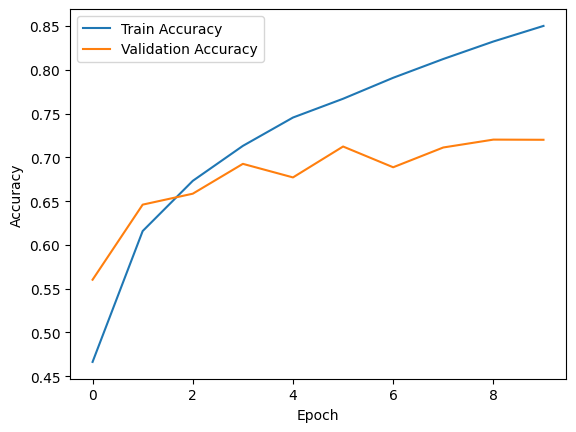

In [ ]:
# Visualizing the perfomance- Plots accuracy over epochs to observe the training progress and helps detect overfitting (when training accuracy is high but validation accuracy is low).

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# 6.DATA AUGMENTATION (Enhances the training dataset by applying transformations to prevent overfitting)

datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,  # Rotate images by 20 degrees
    width_shift_range=0.2,  # Shift images horizontally by 20% of width
    height_shift_range=0.2,  # Shift images vertically by 20% of height
    horizontal_flip=True,  # Flip images horizontally
    zoom_range=0.2,  # Randomly zoom in
)

# Fit data augmentation on training data
datagen.fit(x_train)

In [ ]:
# Training the Model with Augmented Data

history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 80ms/step - accuracy: 0.5643 - loss: 1.2718 - val_accuracy: 0.6933 - val_loss: 0.8785
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 81ms/step - accuracy: 0.6053 - loss: 1.1241 - val_accuracy: 0.6682 - val_loss: 0.9716
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 80ms/step - accuracy: 0.6175 - loss: 1.0869 - val_accuracy: 0.6850 - val_loss: 0.9190
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 82ms/step - accuracy: 0.6306 - loss: 1.0461 - val_accuracy: 0.7111 - val_loss: 0.8421
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - accuracy: 0.6375 - loss: 1.0342 - val_accuracy: 0.6856 - val_loss: 0.9371
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 79ms/step - accuracy: 0.6413 - loss: 1.0056 - val_accuracy: 0.7278 - val_loss: 0.7852
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 81ms/step - accuracy: 0.6576 - loss: 0.9705 - val_accuracy: 0.7019 - val_loss: 0.8755
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step - accuracy: 0.6597 - loss: 0.9718 - 

In [ ]:
# test accuracy after data augmentation
print(f"Augmented Model Test Accuracy: {test_acc * 100:.2f}%")

Augmented Model Test Accuracy: 72.01%


In [ ]:
# 7.TRANSFER LEARNING WITH VGG16 (Instead of learning from scratch, the model reuses knowledge from VGG16 and Faster convergence and higher accuracy with fewer training epochs.)

# Load VGG16 without top layers
base_model = keras.applications.VGG16(weights='imagenet', # loads pretrained weights from ImageNet.
                                      include_top=False, # removes the default classifier head.
                                      input_shape=(32, 32, 3))


# Freeze the base model (so weights don’t change during training)-fine tuning
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Add custom classifier layers on top of VGG16 (to allow the CNN model to learn features relevant to the dataset)

x = keras.layers.Flatten()(base_model.output)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dense(10, activation='softmax')(x)  # 10 classes in CIFAR-10

# Define new model
model = keras.Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
# Train the Model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 566s 723ms/step - accuracy: 0.3774 - loss: 1.7736 - val_accuracy: 0.5207 - val_loss: 1.3660
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 563s 721ms/step - accuracy: 0.4852 - loss: 1.4676 - val_accuracy: 0.5418 - val_loss: 1.3083
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 502s 642ms/step - accuracy: 0.5045 - loss: 1.4061 - val_accuracy: 0.5284 - val_loss: 1.3336
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 560s 716ms/step - accuracy: 0.5138 - loss: 1.3855 - val_accuracy: 0.5398 - val_loss: 1.3074
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 501s 641ms/step - accuracy: 0.5228 - loss: 1.3638 - val_accuracy: 0.5623 - val_loss: 1.2388
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 501s 641ms/step - accuracy: 0.5228 - loss: 1.3503 - val_accuracy: 0.5617 - val_loss: 1.2482
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 559s 715ms/step - accuracy: 0.5263 - loss: 1.3426 - val_accuracy: 0.5546 - val_loss: 1.2643
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 501s 640ms/step - accuracy: 0.5319 - loss: 1.32

In [40]:
# test accuracy after transfer learning
print(f"VGG16 Transfer Final Model Test Accuracy: {test_acc * 100:.2f}%")

VGG16 Transfer Final Model Test Accuracy: 72.01%


In [43]:
# 8. FINE-TUNING THE VGG16 FOR BETTER ACCURACY

# Unfreeze the last 4 layers for fine-tuning
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Why only the last 4 layers?

# Earlier layers learn general features (edges, textures).
# Later layers learn task-specific features (object details).
# We fine-tune the later layers while keeping early layers frozen to avoid overfitting and speed up training.

In [48]:
# Compile with lower learning rate for fine-tuning
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),  # Very small learning rate
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 1661s 2s/step - accuracy: 0.5555 - loss: 1.2565 - val_accuracy: 0.6306 - val_loss: 1.0549
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1647s 2s/step - accuracy: 0.5997 - loss: 1.1306 - val_accuracy: 0.6347 - val_loss: 1.0475
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1717s 2s/step - accuracy: 0.6174 - loss: 1.0795 - val_accuracy: 0.6597 - val_loss: 0.9785
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1643s 2s/step - accuracy: 0.6315 - loss: 1.0438 - val_accuracy: 0.6763 - val_loss: 0.9297
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1774s 2s/step - accuracy: 0.6458 - loss: 1.0037 - val_accuracy: 0.6853 - val_loss: 0.9085
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1672s 2s/step - accuracy: 0.6533 - loss: 0.9780 - val_accuracy: 0.6900 - val_loss: 0.8943
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1703s 2s/step - accuracy: 0.6618 - loss: 0.9529 - val_accuracy: 0.6872 - val_loss: 0.9009
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1695s 2s/step - accuracy: 0.6597 - loss: 0.9549 - val_accurac

313/313 ━━━━━━━━━━━━━━━━━━━━ 85s 273ms/step - accuracy: 0.7033 - loss: 0.8600
Fine-Tuned Test Accuracy: 70.55%


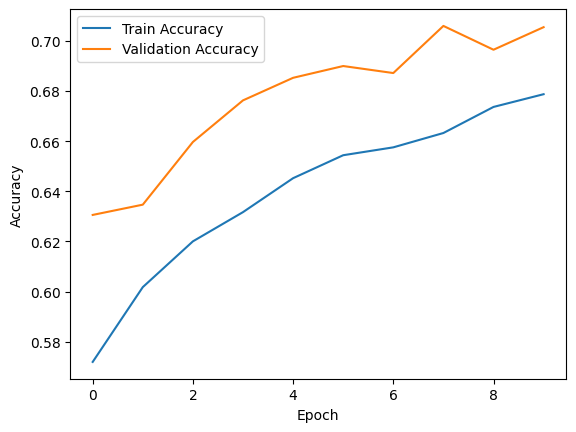

In [50]:
# EVALUATE AND VISUALIZE ACCURACY

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Fine-Tuned Test Accuracy: {test_acc * 100:.2f}%")

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()